<a href="https://colab.research.google.com/github/AfricanLeo/Monty_Hall_Probabilities/blob/main/Monty_Hall_Probabilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Monty Hall Probabilities Trial
[Compliments of the Super Data Science Team](https://www.superdatascience.com/)

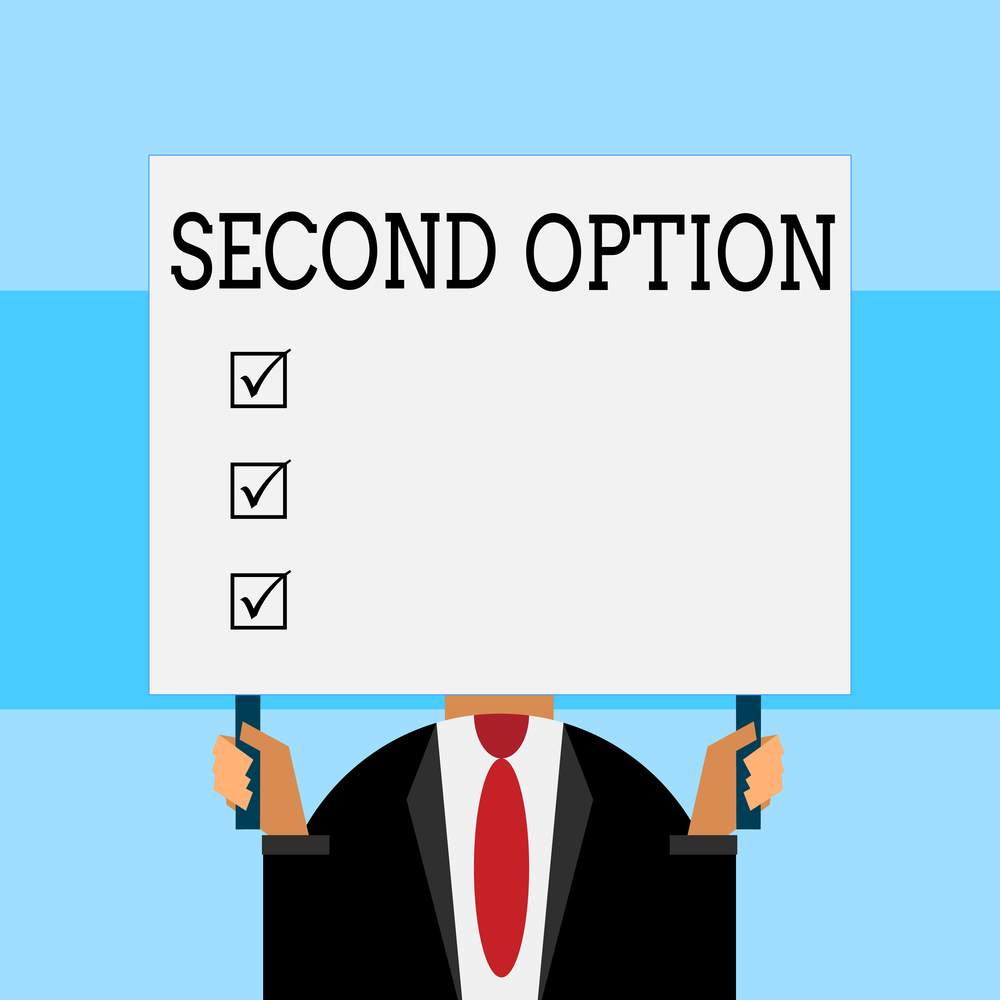

The Monty Hall problem is a brain teaser, in the form of a probability puzzle, loosely based on the American television game show Let's Make a Deal and named after its original host, Monty Hall. 

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say number 1, and the host, who knows what's behind the doors, opens another door, say number 3, which has a goat. He then says to you, "Do you want to pick door number 2?" Is it to your advantage to switch your choice? 

It turns out that the probabilities of the contestant to win if he changes the door is the double vs not to change, roughly 67% and 33% chance respectively. 

This case study will prove this converging probabilities in the long run (long number of trials) through random experiments, comparing the outcome (winning cases) of changing or not the door. 

Import the libraries

In [33]:
import numpy as np

To run the experiment, we need to define the number of trials and repeat the following steps (each game):
▪ 

*   Create a new game
*   Simulate a guest choice
*   Open one door
*   Change the door
*   Compare both options and keep track of wins for both instances.
*   Print the results

1) newGame():

Create a function that randomly chooses one of the three initial positions of the game, and **returns** a dict like:
 {'door1': 'car', 'door2': 'goat', 'door3': 'goat'}

This function doesn’t have to receive any input parameter since the door number is generated randomly. 

In [34]:
def newGame():
  door = np.random.randint(1,4)
  if door == 1:
    return {'door1': 'car', 'door2': 'goat', 'door3': 'goat' }
  if door == 2:
    return {'door1': 'goat', 'door2': 'car', 'door3': 'goat' }
  if door == 3:
    return {'door1': 'goat', 'door2': 'goat', 'door3': 'car' }

2) guestChoice():

Create a function that randomly chooses one door, as the guest does in the show, and return the number
of the door, like: ‘door1’ 
This function doesn’t have to receive any input parameter.

In [35]:
def guestChoice():
  return 'door' + str(np.random.randint(1, 4))

3) openOneDoor(game, chosen_door):

Create a function that receives a created game and the door chosen by the guest. 
The host of the show should open one door – randomly, once again – but he can’t open the door containing the car neither the same door the guest had chosen. The function should return the modified dict of the game,
presenting the value ‘open’ to the door opened, like:
{'door1': 'car', 'door2': ‘open’, 'door3': 'goat'}

In [36]:
def openOneDoor(game, chosen_door):
  options = []
  for door in game:
    if game[door] != 'car' and door != chosen_door:
      options.append(door)
  game[np.random.choice(options)] = 'open'
  return game

4) guestChange(game, chosen_door):

Create a function that receives a created game and the door chosen by the guest. At this stage of the
game, the guest should decide if he will change to the other closed door or not. The function should
return the number of the door, like: ‘door1’

For comparison, let’s keep the first choice in a different variable.

In [37]:
def guestChange(game, chosen_door):
  options = []
  for door in game:
    if game[door] != 'open' and door != chosen_door:
      options.append(door)
  return options[0]


5) checkResult(game, chosen_door):

Create a function that receives a created game and a door, returning ‘win’ in case the door contains a
car or ‘lose’ in case the door contains a goat.

In [38]:
def checkResult(game, chosen_door):
  if game[chosen_door] == 'car':
    return 'win'
  else:
    return 'lose'

Let's add it all together and run the experiment:

In [39]:
num_trails = 10000
change_wins = 0
dont_change_wins = 0

for i in range(num_trails):
  #create a new game
  game = newGame()
  #simulate a guest choice
  chosen_door = guestChoice()
  #host opens one door and game is updated with the open door
  game = openOneDoor(game, chosen_door)
  #option should guest change to suggested door
  new_open_door = guestChange(game, chosen_door)

  #now check wins for original choice versus wins for suggested choice
  if checkResult(game, chosen_door) == 'win':
    dont_change_wins += 1
  if checkResult(game, new_open_door) == 'win':
    change_wins += 1

Print the results

In [40]:
#print(dont_change_wins/num_trails*100)
#print(change_wins/num_trails*100)
print('Change to suggestion of Host      : {} out of {} trails, yielding {:0.2f}%'.format(change_wins, num_trails, change_wins/num_trails*100))
print('Dont change to suggestion of Host : {} out of {} trails, yielding {:0.2f}%'.format(dont_change_wins, num_trails, dont_change_wins/num_trails*100))

Change to suggestion of Host      : 6716 out of 10000 trails, yielding 67.16%
Dont change to suggestion of Host : 3284 out of 10000 trails, yielding 32.84%
